In [2]:
from keras.datasets import cifar10

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [17]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

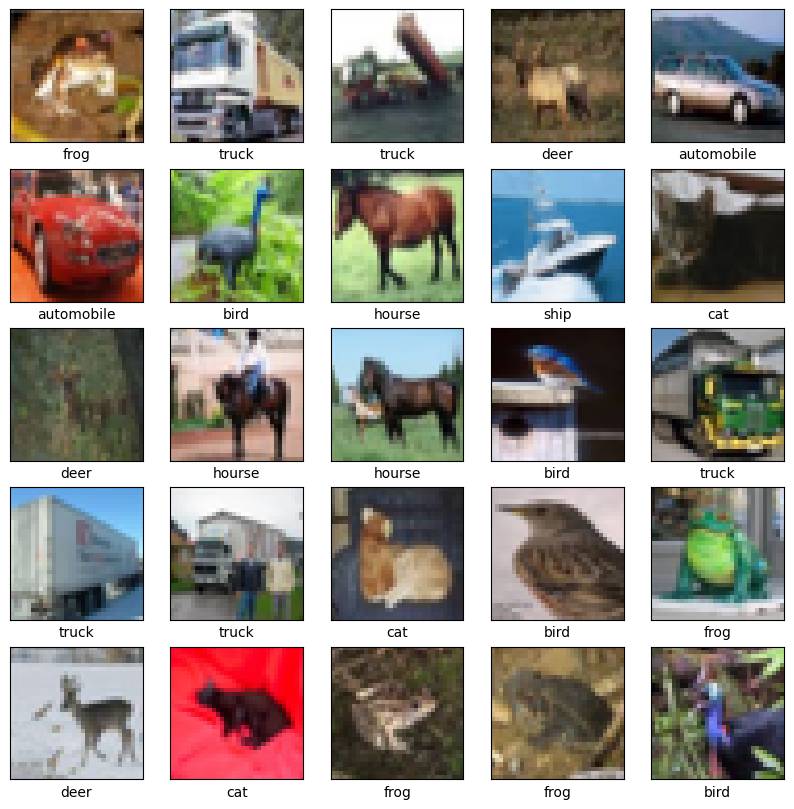

In [19]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','hourse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
x_test.shape

(10000, 32, 32, 3)

In [22]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [23]:
x_train/=255

In [24]:
x_train/=255

In [25]:
from keras.models import Sequential
model=Sequential()

In [26]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=x_train.shape[1:]))

In [27]:
model.add(Activation('relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(512))

In [32]:
model.add(Activation('relu'))

In [36]:
model.add(Dropout(0.5))

In [37]:
model.add(Dense(10))

In [38]:
model.add(Activation('softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics="accuracy")

In [40]:
from keras.utils import to_categorical

In [41]:
y_train=to_categorical(y_train,10)

In [42]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [43]:
y_test=to_categorical(y_test,10)

In [44]:
model.fit(x_train,y_train,batch_size=260,epochs=3)

Epoch 1/3
193/193 [==============================] - 130s 668ms/step - loss: 2.1884 - accuracy: 0.1754
Epoch 2/3
193/193 [==============================] - 89s 460ms/step - loss: 2.0258 - accuracy: 0.2480
Epoch 3/3
193/193 [==============================] - 90s 464ms/step - loss: 1.9495 - accuracy: 0.2834


In [45]:
predictions=model.predict(x_test)
for i in range(5):
  print(y_test[i])
  print(predictions[i])

313/313 [==============================] - 7s 23ms/step
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.99999994 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.99999994 0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.99999994 0.        ]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.99999994 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.99999994 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
